# **python 3: essentials** - part 7/11

## **Advances SciPy**

### **FFT (Fast Fourier Transform)**

Fourier trasform of a generic function
$$f(x) = e^{-\alpha x^2}$$

with FT equal to

$$\sqrt{\frac{\pi}{\alpha}} e^{-(\pi x)^2/\alpha}$$

In [7]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [8]:
# define functions, a gaussian like function
def func(x,alpha):
    return np.exp(-alpha*x**2)

# the analytical FT
def func_FT(x,alpha):
    return np.sqrt(np.pi/alpha)*np.exp(-(np.pi*x)**2/alpha)

In [9]:
# sample points
N = 10000
x = np.linspace(-10,10,N)
y = func(x,2)
dx = x[1]-x[0]

In [10]:
# perform the FFT, recall the FT is a complex quantity even for real functions. 
# In the latter case the FT shows the hermitain property among positive and negative freqs
FT = scipy.fft.fft(y)

# get directly the frequecies
f = scipy.fft.fftfreq(N, dx)

# the first N/2 points corresponds to positive frequencies, the other N/2 are the negative frequencies
print(f[:N//2])
print(f[N//2:])

[0.00000000e+00 4.99950000e-02 9.99900000e-02 ... 2.49825015e+02
 2.49875010e+02 2.49925005e+02]
[-2.49975000e+02 -2.49925005e+02 -2.49875010e+02 ... -1.49985000e-01
 -9.99900000e-02 -4.99950000e-02]


(-4.0, 4.0)

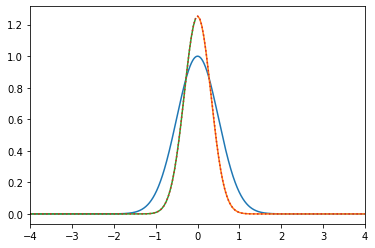

In [11]:
fig, ax=plt.subplots()

ax.plot(x,y)
ax.plot(f[:N//2],dx*np.sqrt(FT[:N//2].real**2+FT[:N//2].imag**2),'-')
ax.plot(f[N//2:],dx*np.sqrt(FT[N//2:].real**2+FT[N//2:].imag**2),'-')
ax.plot(x,func_FT(x,2), ':')
ax.set_xlim(-4,4)

### **Time series**

we now consider a time series

In [12]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def time_series(t):
    
    freq1, freq2, freq3 = 1., 4, 7
    
    return 3*np.sin(2*np.pi*freq1*t) + np.sin(2*np.pi*freq2*t) + 0.5* np.sin(2*np.pi*freq3*t)

In [13]:
def perform_FT(N,T):
    t = np.linspace(0,T,N)
    dt = t[1]-t[0]
    samples = time_series(t)


    FT = scipy.fft.fft(samples)
    f = scipy.fft.fftfreq(N, dt)

    print("N =",N)
    print("T =",T)
    print("F_nyq =",1/(2*dt))
    print("maximum frequency =",f[N//2])
    print("mimimum frequency =",1/T)
    
    return t,samples,f,FT

def perform_FT_window(N,T):
    t = np.linspace(0,T,N)
    dt = t[1]-t[0]
    samples = time_series(t)


    FT = scipy.fft.fft(np.hamming(N)*samples)
    f = scipy.fft.fftfreq(N, dt)

    print("N =",N)
    print("T =",T)
    print("F_nyq =",1/(2*dt))
    print("maximum frequency =",f[N//2])
    print("mimimum frequency =",1/T)
    
    return t,samples,f,FT

N = 1000
T = 15
F_nyq = 33.3
maximum frequency = -33.300000000000004
mimimum frequency = 0.06666666666666667

 [ 15  60 105 895 940 985] [ 0.999  3.996  6.993 -6.993 -3.996 -0.999] {'peak_heights': array([1499.02607143,  496.38919311,  244.04820046,  244.04820046,
        496.38919311, 1499.02607143])}


(1e-05, 10.0)

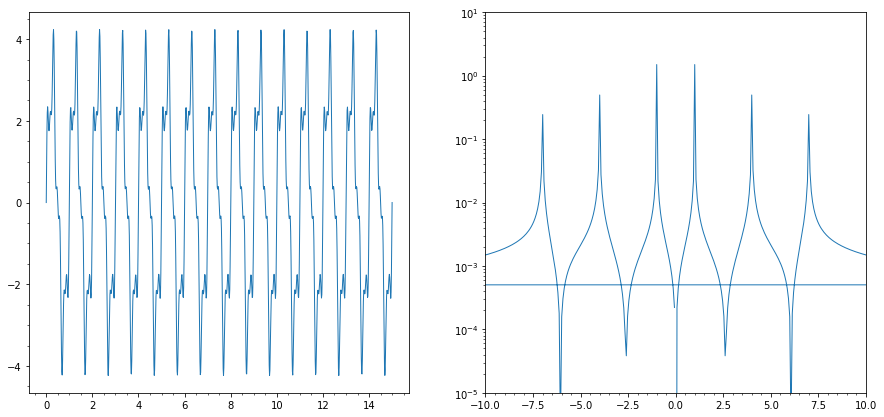

In [14]:
t,s,f,FT = perform_FT(1000,15)
peaks1, prop1 = find_peaks(np.sqrt(FT.real**2+FT.imag**2),height=0)
print("\n",peaks1, f[peaks1], prop1)

fig, ax=plt.subplots(1,2,figsize=(15,7))

ax[0].plot(t,s,linewidth=1)
ax[0].minorticks_on()

ax[1].plot(f,np.sqrt(FT.real**2+FT.imag**2)/1000,linewidth=1)
ax[1].set_xlim(-10,10)
ax[1].minorticks_on()
ax[1].set_yscale('log')
ax[1].set_ylim(1e-5,1e1)

N = 100
T = 15
F_nyq = 3.3
maximum frequency = -3.3000000000000003
mimimum frequency = 0.06666666666666667

 [ 6 15 39 61 85 94] [ 0.396  0.99   2.574 -2.574 -0.99  -0.396] {'peak_heights': array([ 25.96318234, 143.10133395,  39.23260032,  39.23260032,
       143.10133395,  25.96318234])}


(1e-05, 10.0)

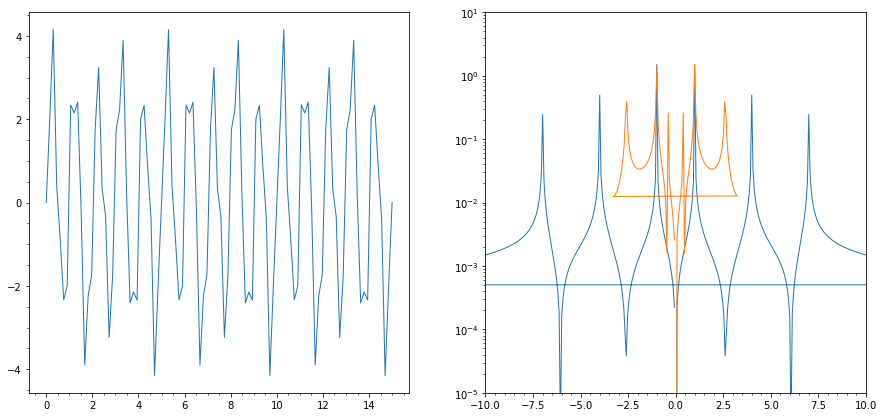

In [15]:
# Aliasing
t2,s2,f2,FT2 = perform_FT(100,15)
peaks, prop = find_peaks(np.sqrt(FT2.real**2+FT2.imag**2),height=0)
print("\n",peaks, f2[peaks], prop)

fig, ax=plt.subplots(1,2,figsize=(15,7))

ax[0].plot(t2,s2,linewidth=1)
ax[0].minorticks_on()

ax[1].plot(f,np.sqrt(FT.real**2+FT.imag**2)/1000,'-',linewidth=1)
ax[1].plot(f2,np.sqrt(FT2.real**2+FT2.imag**2)/100,'-',linewidth=1)
ax[1].set_xlim(-10,10)
ax[1].minorticks_on()
ax[1].set_yscale('log')
ax[1].set_ylim(1e-5,1e1)

N = 1000
T = 2.2
F_nyq = 227.04545454545453
maximum frequency = -227.04545454545453
mimimum frequency = 0.45454545454545453
N = 1000
T = 2.2
F_nyq = 227.04545454545453
maximum frequency = -227.04545454545453
mimimum frequency = 0.45454545454545453

 [  2   9  15 985 991 998] [ 0.90818182  4.08681818  6.81136364 -6.81136364 -4.08681818 -0.90818182] {'peak_heights': array([1393.0856815 ,  428.15852641,  173.2073235 ,  173.2073235 ,
        428.15852641, 1393.0856815 ])}


(1e-05, 10.0)

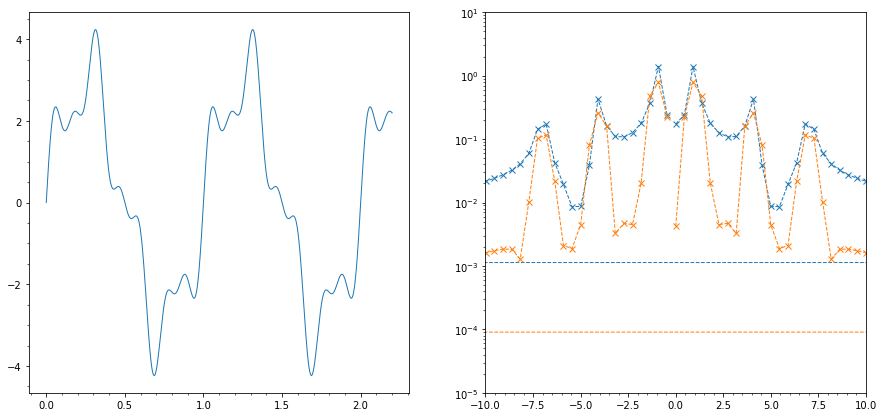

In [16]:
# leakage
t3,s3,f3,FT3 = perform_FT(1000,2.2)
t4,s4,f4,FT4 = perform_FT_window(1000,2.2)
peaks, prop = find_peaks(np.sqrt(FT3.real**2+FT3.imag**2),height=0)
print("\n",peaks, f3[peaks], prop)

fig, ax=plt.subplots(1,2,figsize=(15,7))

ax[0].plot(t3,s3,linewidth=1)
ax[0].minorticks_on()

ax[1].plot(f3,np.sqrt(FT3.real**2+FT3.imag**2)/1000,'--x',linewidth=1)
ax[1].plot(f4,np.sqrt(FT4.real**2+FT4.imag**2)/1000,'--x',linewidth=1)
ax[1].set_xlim(-10,10)
ax[1].minorticks_on()
ax[1].set_yscale('log')
ax[1].set_ylim(1e-5,1e1)

## **Pandas**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("PS_2022.04.02_06.32.48.csv",header=93)
df

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
2,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32311,ups And d,ups And,0,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
32312,ups And d,ups And,0,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
32313,ups Leo b,ups Leo,1,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513
32314,xi Aql b,xi Aql,0,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.55975,4.70964,0.023,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837


In [23]:
df.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
2,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903


In [24]:
df.describe()

,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,32316.000000,32316.000000,32316.000000,32316.000000,32316.000000,2.951000e+04,2.827300e+04,2.827200e+04,29515.000000,18133.000000,...,30728.000000,31938.000000,31925.000000,31924.000000,31921.000000,31713.000000,31713.000000,31650.000000,31650.000000,31650.000000
mean,0.155001,1.076247,1.878512,2015.014142,0.001485,1.433089e+04,1.681571e+04,-3.721603e+03,-0.000203,2.289207,...,-28.161076,13.829198,0.122771,-0.123475,11.815182,0.035851,-0.035272,13.600296,0.000524,-0.000524
std,0.361911,0.292361,1.192672,3.480253,0.038512,2.341011e+06,2.795283e+06,5.951546e+05,0.020163,73.460549,...,121.469868,2.305031,0.155009,0.188629,2.203409,0.189948,0.179827,2.234050,0.001135,0.001135
min,0.000000,1.000000,1.000000,1989.000000,0.000000,9.070629e-02,0.000000e+00,-1.000000e+08,-1.000000,0.004400,...,-2900.000000,0.872000,0.001000,-12.270000,-3.044000,0.011000,-11.140000,2.926270,0.000122,-0.063232
25%,0.000000,1.000000,1.000000,2014.000000,0.000000,4.736912e+00,9.620000e-06,-2.068250e-04,0.000000,0.053800,...,-22.655000,13.010000,0.057000,-0.138000,11.175000,0.020000,-0.035000,12.844300,0.000254,-0.000506
50%,0.000000,1.000000,1.000000,2016.000000,0.000000,1.109194e+01,4.206000e-05,-4.206000e-05,0.000000,0.097900,...,-9.049501,14.390000,0.092000,-0.092000,12.418000,0.025000,-0.025000,14.222300,0.000354,-0.000354
75%,0.000000,1.000000,2.000000,2016.000000,0.000000,2.766612e+01,2.069000e-04,-9.630000e-06,0.000000,0.201400,...,-2.744000,15.362000,0.138000,-0.057000,13.238000,0.035000,-0.020000,15.133600,0.000506,-0.000254
max,1.000000,4.000000,8.000000,2022.000000,1.000000,4.020000e+08,4.700000e+08,0.000000e+00,1.000000,7506.000000,...,2700.000000,45.340000,11.000000,-0.001000,35.330000,9.995000,-0.011000,20.186100,0.063232,-0.000122


In [2]:
data = df.drop_duplicates(subset="pl_name")

NameError: name 'df' is not defined

In [26]:
pl_name = [str(data["pl_name"].values[i].replace(" ","_")) for i in range(len(data2["pl_name"].values))]
disc_meth = [str(data["discoverymethod"].values[i].replace(" ","_")) for i in range(len(data2["pl_name"].values))]

with open("planets.dat","w") as outfile:
    for i in range(len(pl_name)):
        stringa = "{:<30}{:<30e}{:<30e}{:<30d}{:<30e}{:<30e}{:<30}\n".format(pl_name[i],
                                                               data["pl_bmassj"].values[i],
                                                               data["pl_orbper"].values[i],
                                                               data['disc_year'].values[i],
                                                               data['pl_orbsmax'].values[i],
                                                               data["st_mass"].values[i],
                                                               disc_meth[i])
        outfile.write(stringa)

NameError: name 'data2' is not defined